# Project By: Ammad Umar i170092

# --------------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------------

## Project Guidelines

1. Project Description - The U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Based on your success they have hired you as a machine learning and data science expert to solve some problems related to flights data; when a particular flight is delayed, canceled, and diverted. The dataset that have provided has summarized information of on-time, delayed, canceled, and diverted flights. Which is published in their Consumer Report of 2015. You as a principle scientist are required to extract different patterns and meaning full information using all or any machine learning algorithm.  
 
2. Dataset - The Dataset consists of 3 files with a compressed size of approx. 192 MB is uploaded on google classroom. It has 3 csv files; namely airlines.csv airports.csv and flights.csv. It is up to you as a lead scientist how you use these raw data files. Either you join them together or process them individually is up to you. 
 
3. Evaluation - As there are no straight guidelines, you guys have an open field on how you use all what you have learned in this course. So, obviously every student will have a unique solution. This eliminates the possibility of coincidental or deliberate attempts to similar solutions. Furthermore, you can apply linear/ polynomial regression, classification, clustering etc. algorithms to find pattern and mine information. You will be graded individually, on the amount of effort, extraction of meaningful information and predictions etc. Marking will be relative to the performance of the whole class. This means discussing your solutions with other is probably a bad idea and will make your solution not unique, which will result in your solution being ranked lower in class ranking thus losing marks. 
 
5. Marks will be awarded based on ranking system. There are three brackets of solutions • Best • Medium • Worse So try to position yourself in the best bracket. 
 
6. Guidelines Dataset is attached in the project. This Ipython notebook (https://www.kaggle.com/adveros/flight-delay-eda-exploratory-data-analysis) consists of an Exploratory Data Analysis (EDA) of the data which can help you in understanding the data with visualizations. This file is not compulsory for you to follow but it can give you a jump start in starting your project quickly so do give it a look. You are required to submit two things on submission date. A solution file (Code) and a report which should show your results and analysis of YOUR solution. You can code the solution in any programming language in which you are comfortable in. The project can be done in groups of two. 

7. Cheating/ plagiarism is a BIG NO and will lead to F grade in course if any part of the project is found plagiarized. Try to propose a solution yourself and remember no solution is a wrong solution for this project. Some solutions would be good others not. 

# --------------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------------

## Dataset Variables

1. Year 2008
2. Month 1-12
3. DayofMonth 1-31
4. DayOfWeek 1 (Monday) - 7 (Sunday)
5. DepTime actual departure time (local, hhmm)
6. CRSDepTime scheduled departure time (local, hhmm)
7. ArrTime actual arrival time (local, hhmm)
8. CRSArrTime scheduled arrival time (local, hhmm)
9. UniqueCarrier unique carrier code
10. FlightNum flight number
11. TailNum plane tail number: aircraft registration, unique aircraft identifier
12. ActualElapsedTime in minutes
13. CRSElapsedTime in minutes
14. AirTime in minutes
15. ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the 1. scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
16. DepDelay departure delay, in minutes
17. Origin origin IATA airport code
18. Dest destination IATA airport code
19. Distance in miles
20. TaxiIn taxi in time, in minutes
21. TaxiOut taxi out time in minutes
22. Cancelled *was the flight cancelled
23. CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24. Diverted 1 = yes, 0 = no
25. CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
26. WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
27. SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
28. LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

# --------------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------------

## Import Libraries

In [1]:
import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
from scipy import stats
from scipy.stats import norm
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression 

pd.options.display.float_format = '{:.0f}'.format

# --------------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------------

## Data Visualization

### Import Dataset

In [2]:
flights = pd.read_csv("flights.csv")
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,ON_TIME,Y,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,1,3,NaN,nan,nan,nan,nan,nan
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,1,3,NaN,nan,nan,nan,nan,nan
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,0,0,NaN,nan,nan,nan,nan,nan
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,1,3,NaN,nan,nan,nan,nan,nan
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,1,3,NaN,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2015,3,25,3,AS,695,N767AS,GEG,SEA,500,...,0,0,1,3,NaN,nan,nan,nan,nan,nan
1048571,2015,3,25,3,B6,746,N659JB,PSE,JFK,500,...,0,0,1,3,NaN,nan,nan,nan,nan,nan
1048572,2015,3,25,3,B6,962,N564JB,SJU,BOS,500,...,0,0,0,0,NaN,3,0,9,4,0
1048573,2015,3,25,3,B6,1504,N606JB,SJU,JFK,500,...,0,0,1,3,NaN,nan,nan,nan,nan,nan


### Columns in Flights Dataset

YEAR	
MONTH	
DAY	
DAY_OF_WEEK	
AIRLINE	
FLIGHT_NUMBER	
TAIL_NUMBER	
ORIGIN_AIRPORT	
DESTINATION_AIRPORT	
SCHEDULED_DEPARTURE	
DEPARTURE_TIME    
DEPARTURE_DELAY	
TAXI_OUT	
WHEELS_OFF	
SCHEDULED_TIME	
ELAPSED_TIME	
AIR_TIME	
DISTANCE	
WHEELS_ON	
TAXI_IN	
SCHEDULED_ARRIVAL	
ARRIVAL_TIME	
ARRIVAL_DELAY	
ARRIVAL_DELAY_STATUS	
DIVERTED	
CANCELLED	
ON_TIME	
Y	
CANCELLATION_REASON	
AIR_SYSTEM_DELAY	
SECURITY_DELAY	
AIRLINE_DELAY	
LATE_AIRCRAFT_DELAY	
WEATHER_DELAY

# --------------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------------

## General Dataset Processing

### Check NaN Values

In [3]:
flights.isnull().sum()

YEAR                          0
MONTH                         0
DAY                           0
DAY_OF_WEEK                   0
AIRLINE                       0
FLIGHT_NUMBER                 0
TAIL_NUMBER                6798
ORIGIN_AIRPORT                0
DESTINATION_AIRPORT           0
SCHEDULED_DEPARTURE           0
DEPARTURE_TIME            33585
DEPARTURE_DELAY           33585
TAXI_OUT                  34176
WHEELS_OFF                34176
SCHEDULED_TIME                2
ELAPSED_TIME              36520
AIR_TIME                  36520
DISTANCE                      0
WHEELS_ON                 34980
TAXI_IN                   34980
SCHEDULED_ARRIVAL             0
ARRIVAL_TIME              34980
ARRIVAL_DELAY             36520
ARRIVAL_DELAY_STATUS          0
DIVERTED                      0
CANCELLED                     0
ON_TIME                       0
Y                             0
CANCELLATION_REASON     1005647
AIR_SYSTEM_DELAY         795962
SECURITY_DELAY           795962
AIRLINE_

### Creating New Variables and Renaming 

In [4]:
flights['DEPARTURE_DATE'] = pd.to_datetime(flights.YEAR*10000+flights.MONTH*100+flights.DAY,format='%Y%m%d')

#### Flight Status, Flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)

In [5]:
for dataset in flights:
    flights.loc[flights['ARRIVAL_DELAY'] <= 15, 'FLIGHT_STATUS'] = 0
    flights.loc[flights['ARRIVAL_DELAY'] >= 15, 'FLIGHT_STATUS'] = 1
    flights.loc[flights['ARRIVAL_DELAY'] >= 60, 'FLIGHT_STATUS'] = 2
    flights.loc[flights['ARRIVAL_DELAY'] == 1, 'FLIGHT_STATUS'] = 3
    flights.loc[flights['CANCELLED'] == 1, 'FLIGHT_STATUS'] = 4
for dataset in flights:
    flights.loc[flights['ON_TIME'] == 1, 'FLIGHT_STATUS'] = 0


#### Cancellation Reason

In [6]:
flights.loc[flights["CANCELLATION_REASON"] =="A", 'CANCELLATION_REASON'] = "0"
flights.loc[flights["CANCELLATION_REASON"] =="B", 'CANCELLATION_REASON'] = "1"
flights.loc[flights["CANCELLATION_REASON"] =="C", 'CANCELLATION_REASON'] = "2"

#### Departure_Delayed_Status, 0=Departure delayed less than 15 minutes, 1=Departure delayed 15 minutes or more

In [7]:
for dataset in flights:
    flights.loc[flights['DEPARTURE_DELAY'] < 15, 'DEPARTURE_DELAYED_STATUS'] = 0
    flights.loc[flights['DEPARTURE_DELAY'] >= 15, 'DEPARTURE_DELAYED_STATUS'] = 1    

#### Arrival_Delayed_Status, 0=Arrived less than 15 minutes late, 1=Arrived 15 minutes or more late

In [8]:
for dataset in flights:
    flights.loc[flights['ARRIVAL_DELAY'] < 15, 'ARRIVAL_DELAYED_STATUS'] = 0
    flights.loc[flights['ARRIVAL_DELAY'] >= 15, 'ARRIVAL_DELAYED_STATUS'] = 1    

### Remove Unwanted Features

In [9]:
flights = flights.drop("YEAR",1) #Converted to date
#flights = flights.drop("DAY",1) #Converted to date
#flights = flights.drop("DEPARTURE_TIME",1) #Of the departure data we only keep the expected 
#flights = flights.drop("DEPARTURE_DELAY",1)
#flights = flights.drop("ARRIVAL_TIME",1)
#flights = flights.drop("SCHEDULED_ARRIVAL",1)
#flights = flights.drop("ELAPSED_TIME",1)
#flights = flights.drop("SCHEDULED_TIME",1)
#flights = flights.drop("DIVERTED",1)
#flights = flights.drop("CANCELLED",1)
#flights = flights.drop("DISTANCE",1)
flights = flights.drop("FLIGHT_NUMBER",1)
flights = flights.drop("TAIL_NUMBER",1)

# --------------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------------

## Dataset Analysis

### Pearsons Correlation matrix

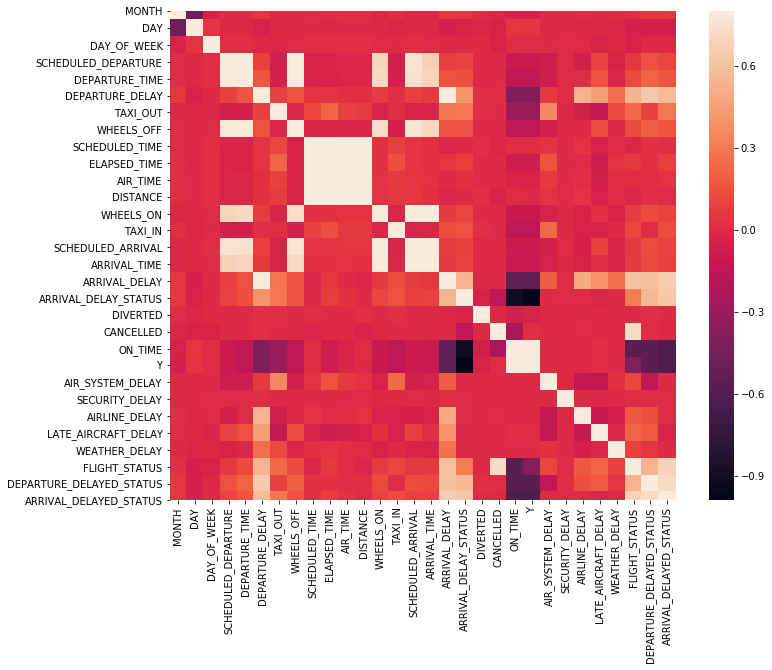

In [10]:
corrmat = flights.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

The correlation coefficient has values between -1 to 1    
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)    
— A value closer to 1 implies stronger positive correlation    
— A value closer to -1 implies stronger negative correlation    

Through the correlation matrix we can see how some variables in the dataset can be linearly predicted from the others.
We can also make the following observations:
1. Only when Arrival Delay is longer than 15 minutes there's data about what caused the delay. Arrival Delay is the sum of AirlineDelay, WeatherDelay and LateAircraftDelay. In cases of cancelation or diversion there's no data related to delay causes.
2. We can predict STATUS(type) using ON_TIME(bool), ARRIVAL DELAY(time), DEPARTURE DELAY(time), CANCELLED(bool) and Y(uncertain) via regularized logistic regression / random forest classification.
3. We can predict ON_TIME(bool) using DEPARTURE_DELAY(time), TAXI_OUT(time), WHEELS_OFF(distance), ELAPSED_TIME(time), TAXI_IN(time), ARRIVAL_DELAY_STATUS(bool), CANCELLED(bool) and Y(uncertain) via regularized logistic regression / random forest classification.
4. We can predict DISTANCE using SCHEDULED_TIME, ELAPSED_TIME and AIR_TIME via regularized linear regression.
5. We can predict ARRIVAL_TIME(time) using SCHEDULED_DEPARTURE(time), DEPARTURE_TIME(time), WHEELS_OFF(time), WHEELS_ON(time) and SCHEDULED_ARRIVAL(time) via regularized linear regression.
6. we can predict ARRIVAL_DELAYED_STATUS using 

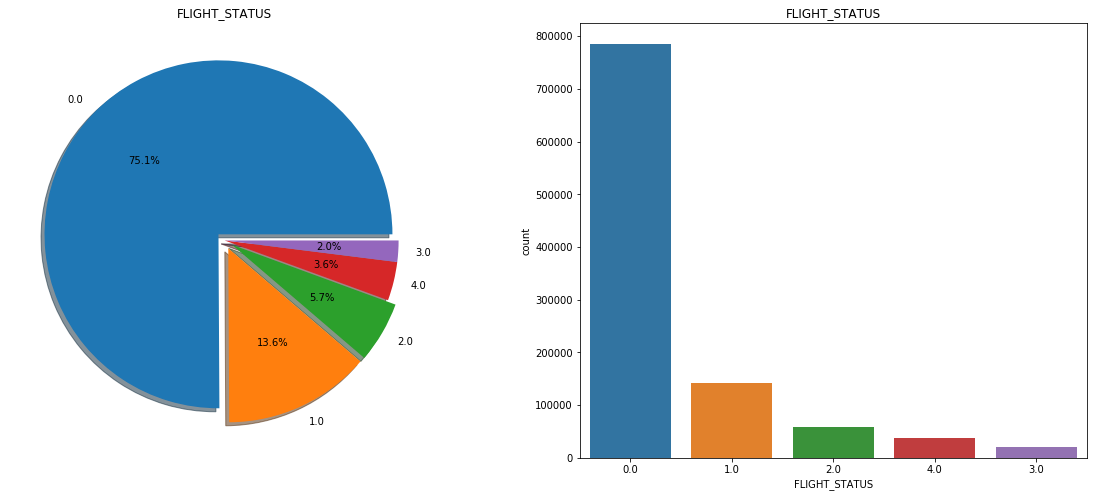

FLIGHT_STATUS represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)


In [11]:
f,ax=plt.subplots(1,2,figsize=(20,8))
flights['FLIGHT_STATUS'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('FLIGHT_STATUS')
ax[0].set_ylabel('')
sns.countplot('FLIGHT_STATUS',order = flights['FLIGHT_STATUS'].value_counts().index, data=flights,ax=ax[1])
ax[1].set_title('FLIGHT_STATUS')
plt.show()
print('FLIGHT_STATUS represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')

#### Cancelled flights

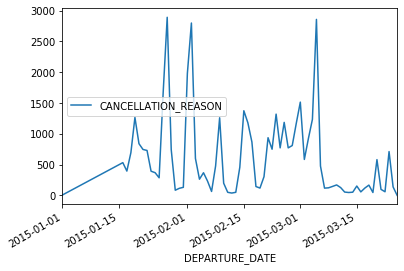

In [12]:
flights[['DEPARTURE_DATE','CANCELLATION_REASON']].groupby(['DEPARTURE_DATE']).count().plot()
plt.show()

#### Delayed flights

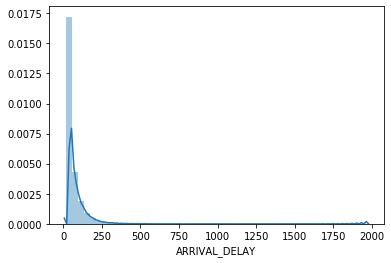

Skewness: 5.578332


In [13]:
Delayedflights = flights[(flights.FLIGHT_STATUS >= 1) &(flights.FLIGHT_STATUS < 3)]
sns.distplot(Delayedflights['ARRIVAL_DELAY'])
plt.show()
print("Skewness: %f" % Delayedflights['ARRIVAL_DELAY'].skew())

The delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time

#### Delays/Month

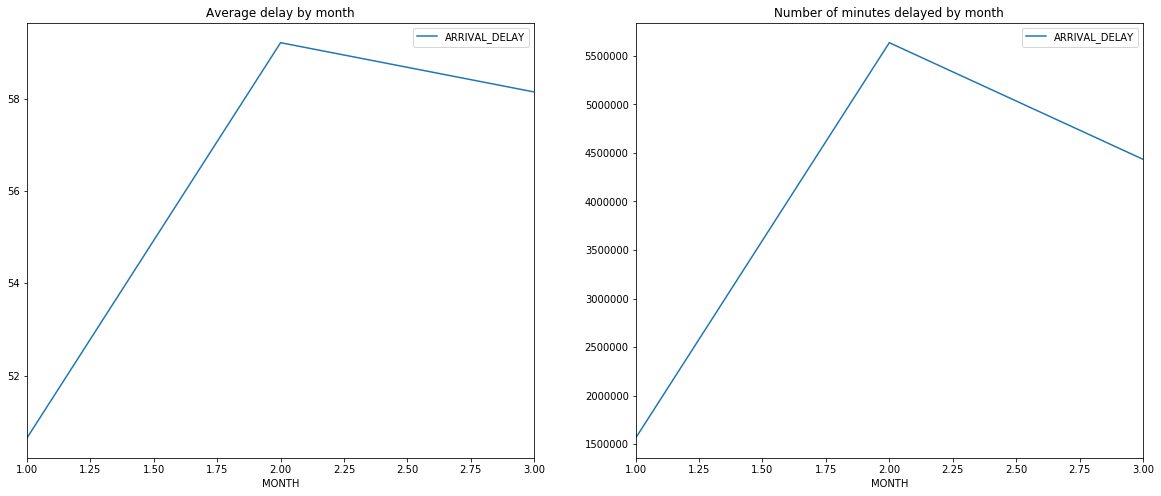

In [14]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights[['MONTH','ARRIVAL_DELAY']].groupby(['MONTH']).mean().plot(ax=ax[0])
ax[0].set_title('Average delay by month')
Delayedflights[['MONTH','ARRIVAL_DELAY']].groupby(['MONTH']).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes delayed by month')
plt.show()

#### Delay Types

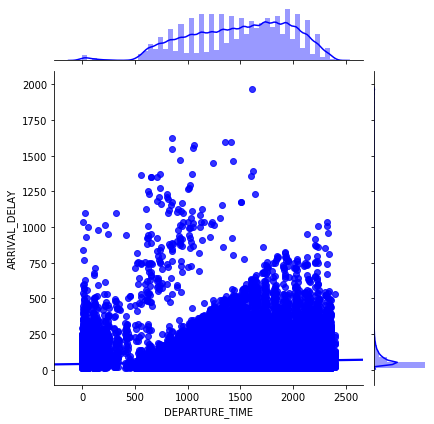

In [15]:
sns.jointplot(x='DEPARTURE_TIME',y='ARRIVAL_DELAY',data=Delayedflights,kind='reg', color='b',fit_reg = True)
plt.show()

As the day goes on, there are more and more delays.    The delayed flights get divided into two groups: one with longer delays and other with shorter. Maybe the delays generated by previous flights either increase or decrease in each following trip.

#### Corelation Between Delays

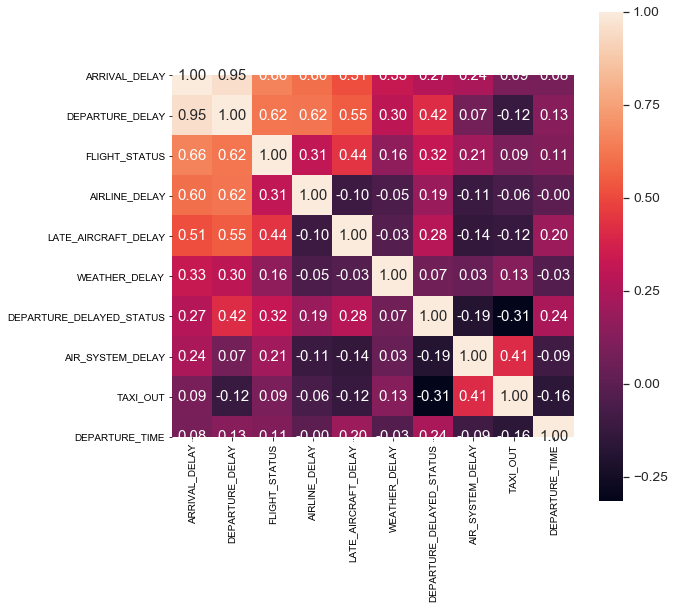

In [16]:
delcorrmat = Delayedflights.corr()
k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize=(9, 9))
cols = delcorrmat.nlargest(k, 'ARRIVAL_DELAY')['ARRIVAL_DELAY'].index
cm = np.corrcoef(Delayedflights[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

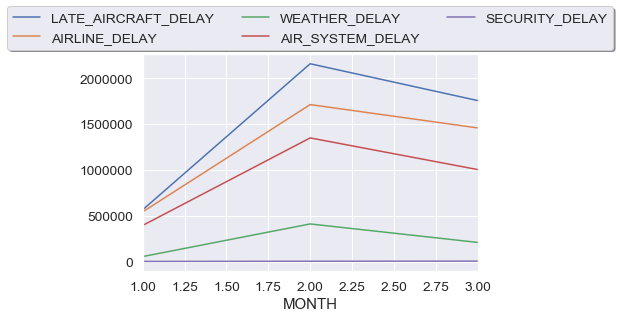

In [17]:
df2 = Delayedflights.filter(['MONTH','AIRLINE_DELAY','WEATHER_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'], axis=1)
df2 = df2.groupby('MONTH')['LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','WEATHER_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()

There doesn't seem to be a significant correlation between the types of delay. 

#### Comparing Airlines

In [18]:
print(flights['AIRLINE'].value_counts())

WN    223370
DL    150071
EV    111038
OO    106053
AA     96926
UA     88495
US     73320
MQ     63489
B6     47804
AS     29729
NK     19700
F9     14451
HA     13876
VX     10253
Name: AIRLINE, dtype: int64


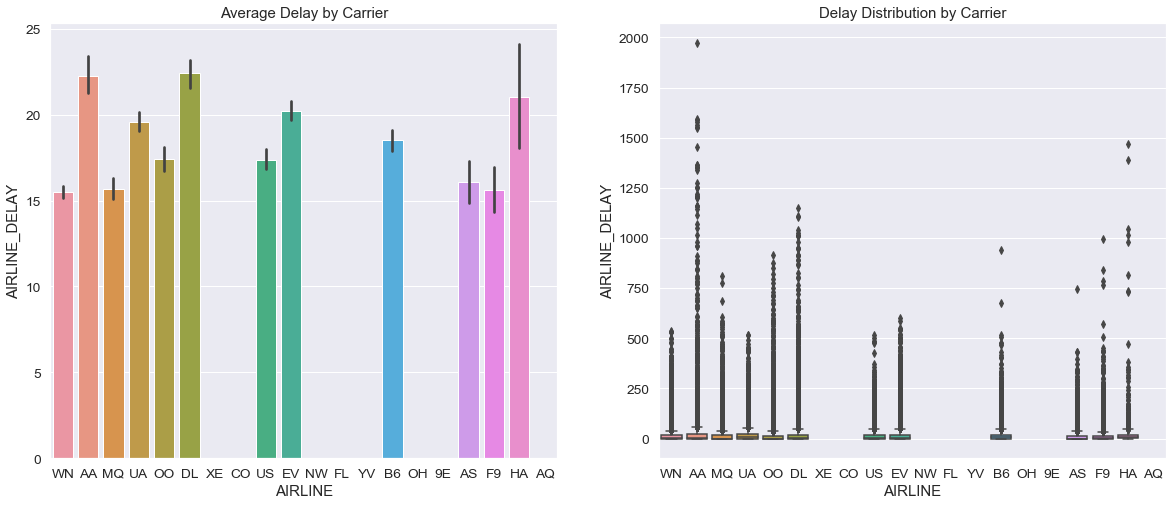

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [19]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('AIRLINE','AIRLINE_DELAY', data=Delayedflights,ax=ax[0], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[0].set_title('Average Delay by Carrier')
sns.boxplot('AIRLINE','AIRLINE_DELAY', data=Delayedflights,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines','US: US Airways',
       'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])

# --------------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------------

## Predict Arrival Delayed Status using Random Forest Classification<br/>
Arrived less than 15 minutes late (0), Arrived 15 minutes or more late (1)

### Dataset Pre-processing

#### Dataset Trimming

In [20]:
dataset_Predict_Arrival_Delayed_Status = flights[["MONTH", "DAY", "DAY_OF_WEEK", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT", "SCHEDULED_DEPARTURE", "ON_TIME", "DEPARTURE_DELAYED_STATUS", "ARRIVAL_DELAYED_STATUS"]]
dataset_Predict_Arrival_Delayed_Status

,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,ON_TIME,DEPARTURE_DELAYED_STATUS,ARRIVAL_DELAYED_STATUS
0,1,1,4,ANC,SEA,5,1,0,0
1,1,1,4,LAX,PBI,10,1,0,0
2,1,1,4,SFO,CLT,20,0,0,0
3,1,1,4,LAX,MIA,20,1,0,0
4,1,1,4,SEA,ANC,25,1,0,0
...,...,...,...,...,...,...,...,...,...
1048570,3,25,3,GEG,SEA,500,1,0,0
1048571,3,25,3,PSE,JFK,500,1,0,0
1048572,3,25,3,SJU,BOS,500,0,0,1
1048573,3,25,3,SJU,JFK,500,1,0,0


#### Checking NaN Missing Values

In [21]:
dataset_Predict_Arrival_Delayed_Status.isnull().sum()

MONTH                           0
DAY                             0
DAY_OF_WEEK                     0
ORIGIN_AIRPORT                  0
DESTINATION_AIRPORT             0
SCHEDULED_DEPARTURE             0
ON_TIME                         0
DEPARTURE_DELAYED_STATUS    33585
ARRIVAL_DELAYED_STATUS      36520
dtype: int64

In [22]:
dataset_Predict_Arrival_Delayed_Status[dataset_Predict_Arrival_Delayed_Status.isnull().values.any(axis=1)].head()

,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,ON_TIME,DEPARTURE_DELAYED_STATUS,ARRIVAL_DELAYED_STATUS
32,1,1,4,ANC,SEA,135,0,nan,nan
42,1,1,4,PHX,DFW,200,0,nan,nan
68,1,1,4,MAF,IAH,510,0,nan,nan
82,1,1,4,SGF,DFW,525,0,nan,nan
90,1,1,4,RDD,SFO,530,0,nan,nan


Rows with missing DEPARTURE_DELAYED_STATUS values all refer to flights that were canceled or diverted. We can assume these flights were delayed more than 15 falling into catagory of 1.

#### Filling NaN Missing Values

In [23]:
dataset_Predict_Arrival_Delayed_Status = dataset_Predict_Arrival_Delayed_Status.fillna({'ARRIVAL_DELAYED_STATUS': 1})
dataset_Predict_Arrival_Delayed_Status = dataset_Predict_Arrival_Delayed_Status.fillna({'DEPARTURE_DELAYED_STATUS': 1})
dataset_Predict_Arrival_Delayed_Status.isnull().sum()

MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
ON_TIME                     0
DEPARTURE_DELAYED_STATUS    0
ARRIVAL_DELAYED_STATUS      0
dtype: int64

#### SCHEDULED_DEPARTURE In Correct Format

In [24]:
"""for index, row in dataset_Predict_Flights.iterrows():
    dataset_Predict_Flights.loc[index, 'SCHEDULED_DEPARTURE'] = math.floor(row['SCHEDULED_DEPARTURE'] / 100)
dataset_Predict_Flights"""

"for index, row in dataset_Predict_Flights.iterrows():\n    dataset_Predict_Flights.loc[index, 'SCHEDULED_DEPARTURE'] = math.floor(row['SCHEDULED_DEPARTURE'] / 100)\ndataset_Predict_Flights"

In [25]:
dataset_Predict_Arrival_Delayed_Status = pd.get_dummies(dataset_Predict_Arrival_Delayed_Status, columns=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])
dataset_Predict_Arrival_Delayed_Status.head()

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,ON_TIME,DEPARTURE_DELAYED_STATUS,ARRIVAL_DELAYED_STATUS,ORIGIN_AIRPORT_ABE,ORIGIN_AIRPORT_ABI,ORIGIN_AIRPORT_ABQ,...,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
0,1,1,4,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,4,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,4,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,4,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,4,25,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Build Model

In [26]:
predict_Arrival_Delayed_Status_Train_x, predict_Arrival_Delayed_Status_Test_x, predict_Arrival_Delayed_Status_Train_y, predict_Arrival_Delayed_Status_Test_y = train_test_split(dataset_Predict_Arrival_Delayed_Status.drop('ARRIVAL_DELAYED_STATUS', axis=1), dataset_Predict_Arrival_Delayed_Status['ARRIVAL_DELAYED_STATUS'], test_size=0.2, random_state=42)

Splitting the orignal dataset into training set containing (80%), and a test set(20%). Rows are randomized using random_state. train_test_split function returns four dataframes. 

#### Mean Normalization

In [27]:
#predict_Arrival_Delayed_Status_Train_x = preprocessing.scale(predict_Arrival_Delayed_Status_Train_x)

In [28]:
predict_Arrival_Delayed_Status_Train_x

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,ON_TIME,DEPARTURE_DELAYED_STATUS,ORIGIN_AIRPORT_ABE,ORIGIN_AIRPORT_ABI,ORIGIN_AIRPORT_ABQ,ORIGIN_AIRPORT_ABR,...,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
408561,2,12,4,1833,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70143,1,21,3,1125,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
708782,3,4,3,750,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
572694,2,23,1,1320,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
774181,3,8,7,950,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2,3,2,600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365838,2,10,2,655,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131932,1,25,7,1428,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
671155,3,1,7,1850,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
predict_Arrival_Delayed_Status_Test_x

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,ON_TIME,DEPARTURE_DELAYED_STATUS,ORIGIN_AIRPORT_ABE,ORIGIN_AIRPORT_ABI,ORIGIN_AIRPORT_ABQ,ORIGIN_AIRPORT_ABR,...,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
781974,3,8,7,1740,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
937737,3,18,3,848,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
907828,3,16,1,1204,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
784628,3,8,7,2020,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
662460,3,1,7,1000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673443,3,1,7,2150,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
656736,2,28,6,1820,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
858501,3,13,5,1020,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
617079,2,26,4,925,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
predict_Arrival_Delayed_Status_Train_x.shape

(838860, 636)

In [31]:
predict_Arrival_Delayed_Status_Test_x.shape

(209715, 636)

#### Hyperparameter Tuning Using Cross Validation (CV):<br />

max_depth<br />
min_sample_split<br />
max_leaf_nodes<br />
min_samples_leaf<br />
n_estimators<br />
max_sample (bootstrap sample)<br />
max_features<br />

For random forest algorithms, one can manipulate a variety of key attributes that define model structure. A comprehensive list can be found under the documentation for scikit-learn’s random forest classifier found here. The following five hyperparameters are commonly adjusted:

N_estimators

Random forest models are ensembles of decision trees and we can define the number of decision trees in the forest. Additional decision trees typically improve model accuracy because predictions are made based on a larger number of “votes” from diverse trees, however, large numbers of trees are computationally expensive.

Max_features

Random forest models randomly resample features prior to determining the best split. Max_features determines the number of features to resample. Larger max_feature values can result in improved model performance because trees have a larger selection of features from which choose the best split, but can also cause trees to be less diverse and induce overfitting. The common theme here is one needs to identify an optimal value that balances overfitting and under-fitting. Common choices include:

‘auto’: places no restrictions on the number of features,

‘sqrt’: square root of the total number of features,

‘log2’: base two logarithm of the total number of features.

Max_depth

Each tree in the random forest model makes multiple splits to isolate homogeneous groups of outcomes. Larger numbers of splits allowed in each tree enables the trees to explain more variation in the data, however, trees with many splits may overfit the data. A range of depth values should be evaluated, including “None” where trees are split until all the leaves are pure.

Min_samples_split

We can control the minimum number of samples required to split each node. Values too large may cause under-fitting, as the trees won’t be able to split enough times to achieve node purity. This hyperparameter should be based on the number of records in the training dataset.

Min_samples_leaf

Much like stopping the growth of trees once a minimum number of samples per split is reached, we can set the minimum number of samples required for each leaf. With values too large, the trees may not be able to split enough to capture sufficient variation in the data. Optimal values for this hyperparameter are dependent on the size of the training set.

Cross-validation is often used to determine the optimal values for hyperparameters; we want to identify a model structure that performs the best on records it has not been trained on. 

In [32]:
# number of trees
n_estimators = [10, 50, 100, 500]

#max number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]

#max number of levels in tree
max_depth = [10, 20, 30, 40, 50, None]

#Min number of samples to split a node
min_samples_split = [2, 5, 10, 15, 20]

#Min number of samples at each leaf node
min_samples_leaf = [1, 2, 5, 10, 15]

In [33]:
grid_param = {
    "n_estimators" : n_estimators,
    "max_features" : max_features,
    "max_depth" : max_depth,
    "min_samples_split" : min_samples_split,
    "min_samples_leaf" : min_samples_leaf
}

In [34]:
predict_Arrival_Delayed_Status_RF_Model_Random = RandomForestClassifier(n_estimators = 10, random_state = 42)#13
predict_Arrival_Delayed_Status_RF_Model_Random.fit(predict_Arrival_Delayed_Status_Train_x, predict_Arrival_Delayed_Status_Train_y)


"""predict_Arrival_Delayed_Status_RF_Model = RandomForestClassifier(random_state = 42)#13
predict_Arrival_Delayed_Status_RF_Model_Random = RandomizedSearchCV(estimator = predict_Arrival_Delayed_Status_RF_Model,
                                                   param_distributions = grid_param,
                                                   n_iter = 10,
                                                   cv = 5,
                                                   verbose = 2,
                                                   random_state = 42,
                                                   n_jobs = -1)
predict_Arrival_Delayed_Status_RF_Model_Random.fit(predict_Arrival_Delayed_Status_Train_x, predict_Arrival_Delayed_Status_Train_y)
print (predict_Arrival_Delayed_Status_RF_Model_Random.best_params_)"""

'predict_Arrival_Delayed_Status_RF_Model = RandomForestClassifier(random_state = 42)#13\npredict_Arrival_Delayed_Status_RF_Model_Random = RandomizedSearchCV(estimator = predict_Arrival_Delayed_Status_RF_Model,\n                                                   param_distributions = grid_param,\n                                                   n_iter = 10,\n                                                   cv = 5,\n                                                   verbose = 2,\n                                                   random_state = 42,\n                                                   n_jobs = -1)\npredict_Arrival_Delayed_Status_RF_Model_Random.fit(predict_Arrival_Delayed_Status_Train_x, predict_Arrival_Delayed_Status_Train_y)\nprint (predict_Arrival_Delayed_Status_RF_Model_Random.best_params_)'

If you don't specify the random_state in the code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time. We now create and train our model. The number of estimators (n_estimators) determines how dense our decision forest is and the random_state is given for reproducibility.

#### Predict Test Set Results

In [35]:
predict_Arrival_Delayed_Status_Train_Predictions = predict_Arrival_Delayed_Status_RF_Model_Random.predict(predict_Arrival_Delayed_Status_Train_x)
predict_Arrival_Delayed_Status_Test_Predictions = predict_Arrival_Delayed_Status_RF_Model_Random.predict(predict_Arrival_Delayed_Status_Test_x)

In [36]:
predict_Arrival_Delayed_Status_RF_Model_Random.score(predict_Arrival_Delayed_Status_Test_x, predict_Arrival_Delayed_Status_Test_y)

0.9143408912094986

#### Precision on Training Set

In [37]:
precision_score(predict_Arrival_Delayed_Status_Train_y, predict_Arrival_Delayed_Status_Train_Predictions)

0.9923409092116235

#### Precision on Test Set

In [38]:
precision_score(predict_Arrival_Delayed_Status_Test_y, predict_Arrival_Delayed_Status_Test_Predictions)

0.8323526170798898

#### Confusion Matrix

TP    FN<br />FP    TN

In [39]:
confusion_matrix(predict_Arrival_Delayed_Status_Test_y, predict_Arrival_Delayed_Status_Test_Predictions)

array([[153983,   7607],
       [ 10357,  37768]], dtype=int64)

#### Recall on Training Set

In [40]:
recall_score(predict_Arrival_Delayed_Status_Train_y, predict_Arrival_Delayed_Status_Train_Predictions)

0.9768379335044782

#### Recall on Test Set

In [41]:
recall_score(predict_Arrival_Delayed_Status_Test_y, predict_Arrival_Delayed_Status_Test_Predictions)

0.7847896103896104

#### F1 Score on Train Set

In [42]:
f1_score(predict_Arrival_Delayed_Status_Train_y, predict_Arrival_Delayed_Status_Train_Predictions)

0.9845283953479794

#### F1 Score on Test Set

In [43]:
f1_score(predict_Arrival_Delayed_Status_Test_y, predict_Arrival_Delayed_Status_Test_Predictions)

0.8078716577540107

# --------------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------------

## Predict Flight Status using Random Forest Classification<br/>
 Flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)

### Dataset Pre-processing

#### Dataset Trimming

In [44]:
dataset_Predict_Flight_Status = flights[["MONTH", "DAY", "DAY_OF_WEEK", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT", "SCHEDULED_DEPARTURE", "SCHEDULED_ARRIVAL", "FLIGHT_STATUS"]]
dataset_Predict_Flight_Status

,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,FLIGHT_STATUS
0,1,1,4,ANC,SEA,5,430,0
1,1,1,4,LAX,PBI,10,750,0
2,1,1,4,SFO,CLT,20,806,0
3,1,1,4,LAX,MIA,20,805,0
4,1,1,4,SEA,ANC,25,320,0
...,...,...,...,...,...,...,...,...
1048570,3,25,3,GEG,SEA,500,605,0
1048571,3,25,3,PSE,JFK,500,907,0
1048572,3,25,3,SJU,BOS,500,908,1
1048573,3,25,3,SJU,JFK,500,906,0


#### Fixing NaN Missing Values

In [45]:
dataset_Predict_Flight_Status.isnull().sum()

MONTH                     0
DAY                       0
DAY_OF_WEEK               0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
SCHEDULED_ARRIVAL         0
FLIGHT_STATUS          2121
dtype: int64

In [46]:
dataset_Predict_Flight_Status = dataset_Predict_Flight_Status[dataset_Predict_Flight_Status['FLIGHT_STATUS'].notna()]

Cannot think of a way to fill flight statuses so decided to drop 2121 / 1048575 values

In [47]:
dataset_Predict_Flight_Status.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
SCHEDULED_ARRIVAL      0
FLIGHT_STATUS          0
dtype: int64

#### SCHEDULED_DEPARTURE In Correct Format

In [48]:
"""for index, row in dataset_Predict_Flights.iterrows():
    dataset_Predict_Flights.loc[index, 'SCHEDULED_DEPARTURE'] = math.floor(row['SCHEDULED_DEPARTURE'] / 100)
dataset_Predict_Flights"""

"for index, row in dataset_Predict_Flights.iterrows():\n    dataset_Predict_Flights.loc[index, 'SCHEDULED_DEPARTURE'] = math.floor(row['SCHEDULED_DEPARTURE'] / 100)\ndataset_Predict_Flights"

In [49]:
dataset_Predict_Flight_Status = pd.get_dummies(dataset_Predict_Flight_Status, columns=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])
dataset_Predict_Flight_Status.head()

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,FLIGHT_STATUS,ORIGIN_AIRPORT_ABE,ORIGIN_AIRPORT_ABI,ORIGIN_AIRPORT_ABQ,ORIGIN_AIRPORT_ABR,...,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
0,1,1,4,5,430,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,4,10,750,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,4,20,806,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,4,20,805,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,4,25,320,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Build Model

In [50]:
predict_Flight_Status_Train_x, predict_Flight_Status_Test_x, predict_Flight_Status_Train_y, predict_Flight_Status_Test_y = train_test_split(dataset_Predict_Flight_Status.drop('FLIGHT_STATUS', axis=1), dataset_Predict_Flight_Status['FLIGHT_STATUS'], test_size=0.2, random_state=42)

Splitting the orignal dataset into training set containing (80%), and a test set(20%). Rows are randomized using random_state. train_test_split function returns four dataframes. 

#### Mean Normalization

In [51]:
#predict_Flight_Status_Train_x = preprocessing.scale(predict_Flight_Status_Train_x)

In [52]:
predict_Flight_Status_Train_x

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,ORIGIN_AIRPORT_ABE,ORIGIN_AIRPORT_ABI,ORIGIN_AIRPORT_ABQ,ORIGIN_AIRPORT_ABR,ORIGIN_AIRPORT_ABY,...,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
987381,3,21,6,810,1108,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
492039,2,18,3,1000,1201,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
944212,3,18,3,1515,1653,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43038,1,19,1,1515,1822,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
608984,2,25,3,1729,1935,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259457,2,3,2,600,838,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366337,2,10,2,720,1008,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131933,1,25,7,1428,1930,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
672433,3,1,7,2005,2142,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
predict_Flight_Status_Test_x

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,ORIGIN_AIRPORT_ABE,ORIGIN_AIRPORT_ABI,ORIGIN_AIRPORT_ABQ,ORIGIN_AIRPORT_ABR,ORIGIN_AIRPORT_ABY,...,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
510886,2,19,4,1232,1407,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
572655,2,23,1,1320,1550,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456871,2,16,1,710,1205,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290509,2,5,4,625,834,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
818913,3,10,2,2141,2255,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627320,2,26,4,1930,2245,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778997,3,8,7,1440,1543,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933775,3,17,2,2210,620,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257651,2,2,1,2007,2043,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
predict_Flight_Status_Train_x.shape

(837163, 635)

In [55]:
predict_Flight_Status_Test_x.shape

(209291, 635)

#### Hyperparameter Tuning Using Cross Validation (CV):<br />

max_depth<br />
min_sample_split<br />
max_leaf_nodes<br />
min_samples_leaf<br />
n_estimators<br />
max_sample (bootstrap sample)<br />
max_features<br />

For random forest algorithms, one can manipulate a variety of key attributes that define model structure. A comprehensive list can be found under the documentation for scikit-learn’s random forest classifier found here. The following five hyperparameters are commonly adjusted:

N_estimators

Random forest models are ensembles of decision trees and we can define the number of decision trees in the forest. Additional decision trees typically improve model accuracy because predictions are made based on a larger number of “votes” from diverse trees, however, large numbers of trees are computationally expensive.

Max_features

Random forest models randomly resample features prior to determining the best split. Max_features determines the number of features to resample. Larger max_feature values can result in improved model performance because trees have a larger selection of features from which choose the best split, but can also cause trees to be less diverse and induce overfitting. The common theme here is one needs to identify an optimal value that balances overfitting and under-fitting. Common choices include:

‘auto’: places no restrictions on the number of features,

‘sqrt’: square root of the total number of features,

‘log2’: base two logarithm of the total number of features.

Max_depth

Each tree in the random forest model makes multiple splits to isolate homogeneous groups of outcomes. Larger numbers of splits allowed in each tree enables the trees to explain more variation in the data, however, trees with many splits may overfit the data. A range of depth values should be evaluated, including “None” where trees are split until all the leaves are pure.

Min_samples_split

We can control the minimum number of samples required to split each node. Values too large may cause under-fitting, as the trees won’t be able to split enough times to achieve node purity. This hyperparameter should be based on the number of records in the training dataset.

Min_samples_leaf

Much like stopping the growth of trees once a minimum number of samples per split is reached, we can set the minimum number of samples required for each leaf. With values too large, the trees may not be able to split enough to capture sufficient variation in the data. Optimal values for this hyperparameter are dependent on the size of the training set.

Cross-validation is often used to determine the optimal values for hyperparameters; we want to identify a model structure that performs the best on records it has not been trained on. 

In [56]:
# number of trees
n_estimators = [10, 50, 100, 500]

#max number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]

#max number of levels in tree
max_depth = [10, 20, 30, 40, 50, None]

#Min number of samples to split a node
min_samples_split = [2, 5, 10, 15, 20]

#Min number of samples at each leaf node
min_samples_leaf = [1, 2, 5, 10, 15]

In [57]:
grid_param = {
    "n_estimators" : n_estimators,
    "max_features" : max_features,
    "max_depth" : max_depth,
    "min_samples_split" : min_samples_split,
    "min_samples_leaf" : min_samples_leaf
}

In [58]:
predict_Flight_Status_RF_Model_Random = RandomForestClassifier(n_estimators = 10, random_state = 42)#13
predict_Flight_Status_RF_Model_Random.fit(predict_Flight_Status_Train_x, predict_Flight_Status_Train_y)


"""predict_Arrival_Delayed_Status_RF_Model = RandomForestClassifier(random_state = 42)#13
predict_Arrival_Delayed_Status_RF_Model_Random = RandomizedSearchCV(estimator = predict_Arrival_Delayed_Status_RF_Model,
                                                   param_distributions = grid_param,
                                                   n_iter = 10,
                                                   cv = 5,
                                                   verbose = 2,
                                                   random_state = 42,
                                                   n_jobs = -1)
predict_Arrival_Delayed_Status_RF_Model_Random.fit(predict_Arrival_Delayed_Status_Train_x, predict_Arrival_Delayed_Status_Train_y)
print (predict_Arrival_Delayed_Status_RF_Model_Random.best_params_)"""

'predict_Arrival_Delayed_Status_RF_Model = RandomForestClassifier(random_state = 42)#13\npredict_Arrival_Delayed_Status_RF_Model_Random = RandomizedSearchCV(estimator = predict_Arrival_Delayed_Status_RF_Model,\n                                                   param_distributions = grid_param,\n                                                   n_iter = 10,\n                                                   cv = 5,\n                                                   verbose = 2,\n                                                   random_state = 42,\n                                                   n_jobs = -1)\npredict_Arrival_Delayed_Status_RF_Model_Random.fit(predict_Arrival_Delayed_Status_Train_x, predict_Arrival_Delayed_Status_Train_y)\nprint (predict_Arrival_Delayed_Status_RF_Model_Random.best_params_)'

If you don't specify the random_state in the code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time. We now create and train our model. The number of estimators (n_estimators) determines how dense our decision forest is and the random_state is given for reproducibility.

#### Predict Test Set Results

In [59]:
predict_Flight_Status_Train_Predictions = predict_Flight_Status_RF_Model_Random.predict(predict_Flight_Status_Train_x)
predict_Flight_Status_Test_Predictions = predict_Flight_Status_RF_Model_Random.predict(predict_Flight_Status_Test_x)

In [60]:
predict_Flight_Status_RF_Model_Random.score(predict_Flight_Status_Test_x, predict_Flight_Status_Test_y)

0.7486561772842597

#### Precision on Train Set

In [61]:
precision_score(predict_Flight_Status_Train_y, predict_Flight_Status_Train_Predictions, average='micro')

0.9750132292038707

#### Precision on Test Set

In [63]:
precision_score(predict_Flight_Status_Test_y, predict_Flight_Status_Test_Predictions, average='micro')

0.7486561772842597

#### Confusion Matrix

TP    FN<br />FP    TN

In [64]:
confusion_matrix(predict_Flight_Status_Test_y, predict_Flight_Status_Test_Predictions)

array([[149812,   5171,   1232,    319,    563],
       [ 24079,   3264,    930,     54,    387],
       [  8689,   1613,   1112,     29,    452],
       [  3782,    175,     45,      9,     17],
       [  3869,    688,    493,     17,   2490]], dtype=int64)

#### Recall on Training Set

In [66]:
recall_score(predict_Flight_Status_Train_y, predict_Flight_Status_Train_Predictions, average='micro')

0.9750132292038707

#### Recall on Test Set

In [67]:
recall_score(predict_Flight_Status_Test_y, predict_Flight_Status_Test_Predictions, average='micro')

0.7486561772842597

#### F1 Score on Train Set

In [69]:
f1_score(predict_Flight_Status_Train_y, predict_Flight_Status_Train_Predictions, average='micro')

0.9750132292038707

#### F1 Score on Test Set

In [70]:
f1_score(predict_Flight_Status_Test_y, predict_Flight_Status_Test_Predictions, average='micro')

0.7486561772842598

# --------------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------------

## Predict Distance using Regularized Linear Regression<br/>

### Dataset Pre-processing

#### Dataset Trimming

In [71]:
dataset_Predict_Distance = flights[["DISTANCE", "SCHEDULED_TIME", "ELAPSED_TIME" , "AIR_TIME", "FLIGHT_STATUS"]]
dataset_Predict_Distance

,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,FLIGHT_STATUS
0,1448,205,194,169,0
1,2330,280,279,263,0
2,2296,286,293,266,0
3,2342,285,281,258,0
4,1448,235,215,199,0
...,...,...,...,...,...
1048570,224,65,60,45,0
1048571,1617,247,245,226,0
1048572,1674,248,251,230,1
1048573,1598,246,230,213,0


#### Fixing NaN Missing Values

In [72]:
dataset_Predict_Distance.isnull().sum()

DISTANCE              0
SCHEDULED_TIME        2
ELAPSED_TIME      36520
AIR_TIME          36520
FLIGHT_STATUS      2121
dtype: int64

In [73]:
dataset_Predict_Distance = dataset_Predict_Distance[dataset_Predict_Distance['SCHEDULED_TIME'].notna()]
dataset_Predict_Distance = dataset_Predict_Distance[dataset_Predict_Distance['ELAPSED_TIME'].notna()]
dataset_Predict_Distance = dataset_Predict_Distance[dataset_Predict_Distance['AIR_TIME'].notna()]
dataset_Predict_Distance = dataset_Predict_Distance[dataset_Predict_Distance['FLIGHT_STATUS'].notna()]

Cannot think of a way to fill missing data so decided to drop NaN values

In [74]:
dataset_Predict_Distance.isnull().sum()

DISTANCE          0
SCHEDULED_TIME    0
ELAPSED_TIME      0
AIR_TIME          0
FLIGHT_STATUS     0
dtype: int64

#### SCHEDULED_DEPARTURE In Correct Format

In [75]:
"""for index, row in dataset_Predict_Flights.iterrows():
    dataset_Predict_Flights.loc[index, 'SCHEDULED_DEPARTURE'] = math.floor(row['SCHEDULED_DEPARTURE'] / 100)
dataset_Predict_Flights"""

"for index, row in dataset_Predict_Flights.iterrows():\n    dataset_Predict_Flights.loc[index, 'SCHEDULED_DEPARTURE'] = math.floor(row['SCHEDULED_DEPARTURE'] / 100)\ndataset_Predict_Flights"

#### Build Model

In [76]:
predict_Distance_Train_x, predict_Distance_Test_x, predict_Distance_Train_y, predict_Distance_Test_y = train_test_split(dataset_Predict_Distance.drop('DISTANCE', axis=1), dataset_Predict_Distance['DISTANCE'], test_size=0.2, random_state=42)

Splitting the orignal dataset into training set containing (80%), and a test set(20%). Rows are randomized using random_state. train_test_split function returns four dataframes. 

#### Mean Normalization

In [77]:
#predict_Distance_Train_x = preprocessing.scale(predict_Distance_Train_x)

In [78]:
predict_Distance_Train_x

,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,FLIGHT_STATUS
253148,60,59,45,0
165626,149,141,121,0
929675,183,184,159,0
500257,106,103,86,0
54572,168,159,134,0
...,...,...,...,...
267961,186,167,145,0
377928,197,190,173,0
131947,110,106,90,0
698988,153,164,124,1


In [79]:
predict_Distance_Test_x

,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,FLIGHT_STATUS
662417,132,132,113,0
892431,75,82,61,1
727323,166,167,147,3
799618,55,55,35,0
750843,160,147,118,0
...,...,...,...,...
830073,318,302,285,0
848703,400,381,334,0
286656,199,220,175,1
639796,70,64,49,0


In [80]:
predict_Distance_Train_x.shape

(809644, 4)

In [81]:
predict_Distance_Test_x.shape

(202411, 4)

#### Hyperparameter Tuning Using Cross Validation (CV):<br />

If you don't specify the random_state in the code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time. We now create and train our model. The number of estimators (n_estimators) determines how dense our decision forest is and the random_state is given for reproducibility.

In [82]:
predict_Distance_LNG_Model = LinearRegression() 
predict_Distance_LNG_Model.fit(predict_Distance_Train_x, predict_Distance_Train_y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predict Test Set Results

In [83]:
predict_Distance_Train_Predictions = predict_Distance_LNG_Model.predict(predict_Distance_Train_x)
predict_Distance_Test_Predictions = predict_Distance_LNG_Model.predict(predict_Distance_Test_x)

In [84]:
predict_Distance_LNG_Model.score(predict_Distance_Test_x, predict_Distance_Test_y)

0.9628722564710592

#### Precision

precision_score(predict_Distance_Train_y, predict_Distance_Train_Predictions, average='micro')

#### Recall

recall_score(predict_Distance_Train_y, predict_Distance_Train_Predictions, average='micro')

#### Note: Accuracy is a classification metric. You can't use it with a regression. 

# --------------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------------

## Summary

### Prediction Model 1:
Predict Arrival Delayed Status
#### Model Type:
Random Forest Classification    
Hyper-parameter Tuning using Cross Validation
#### Prediction Function:
predict_Arrival_Delayed_Status_RF_Model_Random.predict(#Df)
<br/>
### Prediction Model 2:
Predict Flight Status
#### Model Type:
Random Forest Classification    
Hyper-parameter Tuning using Cross Validation
#### Prediction Function:
predict_Flight_Status_RF_Model_Random.predict(#Df)
<br/>
### Prediction Model 3:
Predict Distance
#### Model Type:
Linear Regression    
Hyper-parameter Tuning using Cross Validation
#### Prediction Function:
predict_Distance_LNG_Model.predict(#Df)
